In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/Arra1807/Inform_project_new.git

Cloning into 'Inform_project_new'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 127 (delta 29), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (127/127), 1.06 MiB | 11.24 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [ ]:
import numpy as np
from Inform_project_new.data.echosounder_data.load_data.get_echograms import get_echograms, count_classes_in_echograms

# You can select a specific year or use 'all' to include multiple years.
years = 2014
minimum_shape = 224
tuple_frequencies = (18, 38, 70, 120, 200, 333)
echograms = get_echograms(years=years, tuple_frequencies=tuple_frequencies, minimum_shape=minimum_shape)
print(f"Number of echograms: {len(echograms)}")

In [10]:
from Inform_project_new.data.echosounder_data.preprocessing.resize_and_crop import SplitResizeEchogram, generate_patch_batches
from Inform_project_new.data.echosounder_data.preprocessing.normalization import db, clip, standardize_min_max

data_transform = [db, clip, standardize_min_max]

for e in echograms:
  splitter = SplitResizeEchogram(e, 32)
  generator = splitter(32, data_transform, 'full', False)

label_patch, data_patch, mask_patch = next(generator)
print("Label shape:", label_patch.shape)
print("Data shape:", data_patch.shape)
print("Mask shape:", mask_patch.shape)

Label shape: (819, 32, 32)
Data shape: (819, 6, 32, 32)
Mask shape: (819, 32, 32)


In [15]:
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from Inform_project_new.adaptation_method.model_config import Configuration

run= Configuration()

X_train, X_test = train_test_split(data_patch, test_size = 0.2, random_state = 42, shuffle= True)

train_loader = DataLoader(X_train, run.config['batch_size'], shuffle=True)
test_loader = DataLoader(X_test, run.config['batch_size'], shuffle= True)


ImportError: cannot import name 'Configuration' from 'Inform_project_new.adaptation_method.model_config' (/content/Inform_project_new/adaptation_method/model_config.py)

Epoch 1/70: 100%|██████████| 3/3 [00:05<00:00,  1.73s/it]


 Train Loss = 0.0949 ,Validation Loss = 0.0672


Epoch 2/70: 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]


 Train Loss = 0.0761 ,Validation Loss = 0.0625


Epoch 3/70: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


 Train Loss = 0.0572 ,Validation Loss = 0.0870


Epoch 4/70: 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]


 Train Loss = 0.0538 ,Validation Loss = 0.0554


Epoch 5/70: 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]


 Train Loss = 0.0564 ,Validation Loss = 0.0856


Epoch 6/70: 100%|██████████| 3/3 [00:03<00:00,  1.18s/it]


 Train Loss = 0.0462 ,Validation Loss = 0.0576


Epoch 7/70: 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]


 Train Loss = 0.0426 ,Validation Loss = 0.0729
Stopping early at epoch 7


Epoch 8/70: 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]


 Train Loss = 0.0530 ,Validation Loss = 0.0644


Epoch 9/70: 100%|██████████| 3/3 [00:03<00:00,  1.18s/it]


 Train Loss = 0.0418 ,Validation Loss = 0.0742


Epoch 10/70: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]


 Train Loss = 0.0341 ,Validation Loss = 0.0582


Epoch 11/70: 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]


 Train Loss = 0.0272 ,Validation Loss = 0.0625


Epoch 12/70: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]


 Train Loss = 0.0263 ,Validation Loss = 0.0382


Epoch 13/70: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]


 Train Loss = 0.0243 ,Validation Loss = 0.0406


Epoch 14/70: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]


 Train Loss = 0.0187 ,Validation Loss = 0.0356


Epoch 15/70: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


 Train Loss = 0.0161 ,Validation Loss = 0.0278


Epoch 16/70: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]


 Train Loss = 0.0262 ,Validation Loss = 0.0264


Epoch 17/70: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]


 Train Loss = 0.0251 ,Validation Loss = 0.0176


Epoch 18/70: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]


 Train Loss = 0.0121 ,Validation Loss = 0.0200


Epoch 19/70: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]


 Train Loss = 0.0166 ,Validation Loss = 0.0179


Epoch 20/70: 100%|██████████| 3/3 [00:06<00:00,  2.30s/it]


 Train Loss = 0.0461 ,Validation Loss = 0.0132


Epoch 21/70: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]


 Train Loss = 0.0127 ,Validation Loss = 0.0134


Epoch 22/70: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]


 Train Loss = 0.0125 ,Validation Loss = 0.0126


Epoch 23/70: 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]


 Train Loss = 0.0113 ,Validation Loss = 0.0083


Epoch 24/70: 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]


 Train Loss = 0.0195 ,Validation Loss = 0.0463


Epoch 25/70: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]


 Train Loss = 0.0072 ,Validation Loss = 0.0078


Epoch 26/70: 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]


 Train Loss = 0.0191 ,Validation Loss = 0.0077


Epoch 27/70: 100%|██████████| 3/3 [00:03<00:00,  1.10s/it]


 Train Loss = 0.0181 ,Validation Loss = 0.0071


Epoch 28/70: 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]


 Train Loss = 0.0296 ,Validation Loss = 0.0063


Epoch 29/70: 100%|██████████| 3/3 [00:03<00:00,  1.16s/it]


 Train Loss = 0.0084 ,Validation Loss = 0.0055


Epoch 30/70: 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]


 Train Loss = 0.0180 ,Validation Loss = 0.0053


Epoch 31/70: 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]


 Train Loss = 0.0274 ,Validation Loss = 0.0072


Epoch 32/70: 100%|██████████| 3/3 [00:03<00:00,  1.10s/it]


 Train Loss = 0.0197 ,Validation Loss = 0.0060


Epoch 33/70: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


 Train Loss = 0.0163 ,Validation Loss = 0.0063


Epoch 34/70: 100%|██████████| 3/3 [00:03<00:00,  1.12s/it]


 Train Loss = 0.0123 ,Validation Loss = 0.0068


Epoch 35/70: 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]


 Train Loss = 0.0163 ,Validation Loss = 0.0082


Epoch 36/70: 100%|██████████| 3/3 [00:03<00:00,  1.08s/it]


 Train Loss = 0.0214 ,Validation Loss = 0.0332


Epoch 37/70: 100%|██████████| 3/3 [00:03<00:00,  1.16s/it]


 Train Loss = 0.0073 ,Validation Loss = 0.0065


Epoch 38/70: 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]


 Train Loss = 0.0146 ,Validation Loss = 0.0343


Epoch 39/70: 100%|██████████| 3/3 [00:03<00:00,  1.10s/it]


 Train Loss = 0.0098 ,Validation Loss = 0.0061


Epoch 40/70: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]


 Train Loss = 0.0088 ,Validation Loss = 0.0058


Epoch 41/70: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]


 Train Loss = 0.0066 ,Validation Loss = 0.0060


Epoch 42/70: 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]


 Train Loss = 0.0169 ,Validation Loss = 0.0063


Epoch 43/70: 100%|██████████| 3/3 [00:05<00:00,  1.84s/it]


 Train Loss = 0.0137 ,Validation Loss = 0.0055


Epoch 44/70: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]


 Train Loss = 0.0153 ,Validation Loss = 0.0051


Epoch 45/70: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]


 Train Loss = 0.0139 ,Validation Loss = 0.0058


Epoch 46/70: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]


 Train Loss = 0.0079 ,Validation Loss = 0.0056


Epoch 47/70: 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]


 Train Loss = 0.0082 ,Validation Loss = 0.0057


Epoch 48/70: 100%|██████████| 3/3 [00:04<00:00,  1.62s/it]


 Train Loss = 0.0057 ,Validation Loss = 0.0053


Epoch 49/70: 100%|██████████| 3/3 [00:05<00:00,  1.77s/it]


 Train Loss = 0.0070 ,Validation Loss = 0.0049


Epoch 50/70: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]


 Train Loss = 0.0076 ,Validation Loss = 0.0050


Epoch 51/70: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


 Train Loss = 0.0060 ,Validation Loss = 0.0049


Epoch 52/70: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


 Train Loss = 0.0157 ,Validation Loss = 0.0052


Epoch 53/70: 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]


 Train Loss = 0.0056 ,Validation Loss = 0.0049


Epoch 54/70: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


 Train Loss = 0.0181 ,Validation Loss = 0.0044


Epoch 55/70: 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]


 Train Loss = 0.0058 ,Validation Loss = 0.0044


Epoch 56/70: 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]


 Train Loss = 0.0061 ,Validation Loss = 0.0044


Epoch 57/70: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


 Train Loss = 0.0062 ,Validation Loss = 0.0459


Epoch 58/70: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]


 Train Loss = 0.0134 ,Validation Loss = 0.0052


Epoch 59/70: 100%|██████████| 3/3 [00:03<00:00,  1.18s/it]


 Train Loss = 0.0321 ,Validation Loss = 0.0061


Epoch 60/70: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


 Train Loss = 0.0062 ,Validation Loss = 0.0046


Epoch 61/70: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


 Train Loss = 0.0061 ,Validation Loss = 0.0041


Epoch 62/70: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


 Train Loss = 0.0053 ,Validation Loss = 0.0042


Epoch 63/70: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


 Train Loss = 0.0165 ,Validation Loss = 0.0041


Epoch 64/70: 100%|██████████| 3/3 [00:03<00:00,  1.27s/it]


 Train Loss = 0.0145 ,Validation Loss = 0.0052


Epoch 65/70: 100%|██████████| 3/3 [00:03<00:00,  1.14s/it]


 Train Loss = 0.0063 ,Validation Loss = 0.0360


Epoch 66/70: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


 Train Loss = 0.0075 ,Validation Loss = 0.0040


Epoch 67/70: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


 Train Loss = 0.0047 ,Validation Loss = 0.0436


Epoch 68/70: 100%|██████████| 3/3 [00:03<00:00,  1.14s/it]


 Train Loss = 0.0245 ,Validation Loss = 0.0039


Epoch 69/70: 100%|██████████| 3/3 [00:03<00:00,  1.18s/it]


 Train Loss = 0.0239 ,Validation Loss = 0.0283


Epoch 70/70: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]


 Train Loss = 0.0052 ,Validation Loss = 0.0049


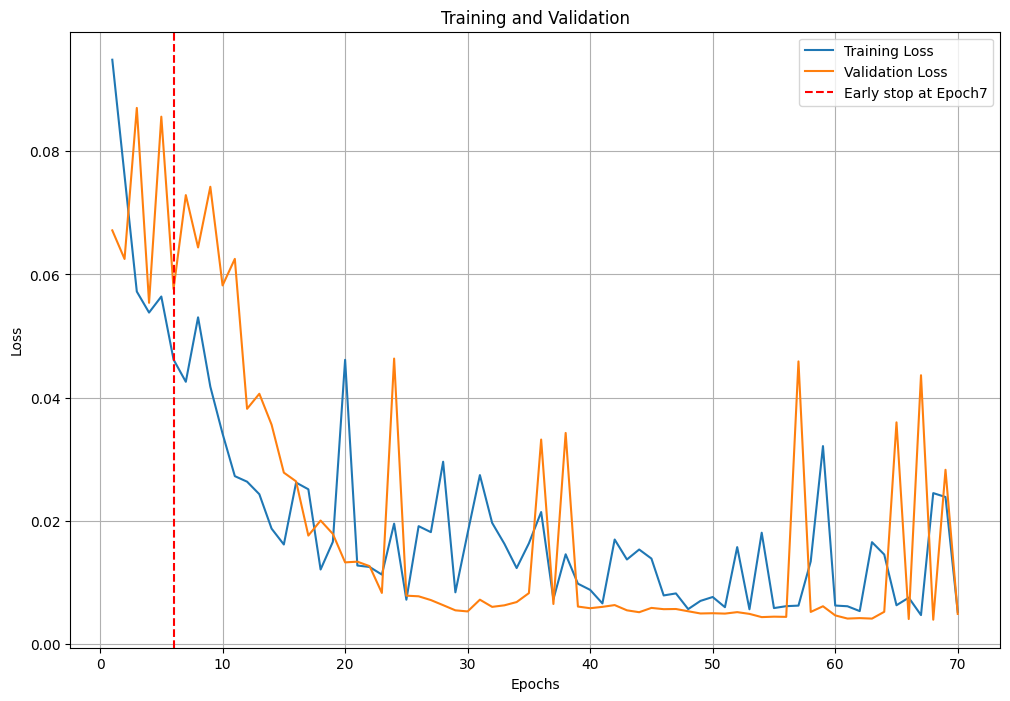

In [ ]:
#from adaptation_method.train_autoencoder import train_val_encoder
import sys
sys.path.append('C:/Users/shado/Documents/Master Thesis/INFORM_marine-main_new/INFORM_marine-main/adaptation_method')
from Inform_project_new.adaptation_method.train_autoencoder.py import train_val_encoder, plot_loss
from Inform_project_new.adaptation_method.Autoencoder.py import ResNetAutoEncoder
import torch.optim as optim
import torch.nn as nn

#Instantiating model
model = ResNetAutoEncoder()

# Defining Loss function and optimizer
Loss_func = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr= run.config['learning_rate'], weight_decay= run.config['Weight_decay'])

encoded, avg_loss_train, val_encoded, avg_loss_val, epoch_stop = train_val_encoder(model, optimizer, Loss_func, run.config['epochs'], train_loader, test_loader, run)

plot_loss(run.config['epochs'], avg_loss_train, avg_loss_val, epoch_stop)

Epoch 1/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/50: 100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


 Train Loss = 0.0791 ,Validation Loss = 0.1336


Epoch 2/50: 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]


 Train Loss = 0.1134 ,Validation Loss = 0.0878


Epoch 3/50: 100%|██████████| 3/3 [00:00<00:00,  6.94it/s]


 Train Loss = 0.1031 ,Validation Loss = 0.0780


Epoch 4/50: 100%|██████████| 3/3 [00:00<00:00,  5.24it/s]


 Train Loss = 0.0623 ,Validation Loss = 0.1123


Epoch 5/50: 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]


 Train Loss = 0.0865 ,Validation Loss = 0.0872


Epoch 6/50: 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]


 Train Loss = 0.0772 ,Validation Loss = 0.0579


Epoch 7/50: 100%|██████████| 3/3 [00:00<00:00,  6.34it/s]


 Train Loss = 0.0684 ,Validation Loss = 0.0800


Epoch 8/50: 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


 Train Loss = 0.0598 ,Validation Loss = 0.0772


Epoch 9/50: 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]


 Train Loss = 0.0635 ,Validation Loss = 0.0808
Stopping early at epoch 9


Epoch 10/50: 100%|██████████| 3/3 [00:00<00:00,  6.88it/s]


 Train Loss = 0.0655 ,Validation Loss = 0.0817


Epoch 11/50: 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]


 Train Loss = 0.0501 ,Validation Loss = 0.0394


Epoch 12/50: 100%|██████████| 3/3 [00:00<00:00,  6.80it/s]


 Train Loss = 0.0576 ,Validation Loss = 0.0525


Epoch 13/50: 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]


 Train Loss = 0.0751 ,Validation Loss = 0.0645


Epoch 14/50: 100%|██████████| 3/3 [00:00<00:00,  6.15it/s]


 Train Loss = 0.0581 ,Validation Loss = 0.0395


Epoch 15/50: 100%|██████████| 3/3 [00:00<00:00,  6.23it/s]


 Train Loss = 0.0507 ,Validation Loss = 0.0575


Epoch 16/50: 100%|██████████| 3/3 [00:00<00:00,  6.68it/s]


 Train Loss = 0.0511 ,Validation Loss = 0.0630


Epoch 17/50: 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]


 Train Loss = 0.0435 ,Validation Loss = 0.0406


Epoch 18/50: 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]


 Train Loss = 0.0463 ,Validation Loss = 0.0420


Epoch 19/50: 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]


 Train Loss = 0.0476 ,Validation Loss = 0.0501


Epoch 20/50: 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


 Train Loss = 0.0402 ,Validation Loss = 0.0360


Epoch 21/50: 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]


 Train Loss = 0.0413 ,Validation Loss = 0.0300


Epoch 22/50: 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]


 Train Loss = 0.0426 ,Validation Loss = 0.0354


Epoch 23/50: 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]


 Train Loss = 0.0472 ,Validation Loss = 0.0350


Epoch 24/50: 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]


 Train Loss = 0.0354 ,Validation Loss = 0.0455


Epoch 25/50: 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]


 Train Loss = 0.0452 ,Validation Loss = 0.0359


Epoch 26/50: 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


 Train Loss = 0.0361 ,Validation Loss = 0.0255


Epoch 27/50: 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]


 Train Loss = 0.0427 ,Validation Loss = 0.0246


Epoch 28/50: 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]


 Train Loss = 0.0381 ,Validation Loss = 0.0190


Epoch 29/50: 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]


 Train Loss = 0.0319 ,Validation Loss = 0.0222


Epoch 30/50: 100%|██████████| 3/3 [00:00<00:00,  6.14it/s]


 Train Loss = 0.0392 ,Validation Loss = 0.0233


Epoch 31/50: 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]


 Train Loss = 0.0448 ,Validation Loss = 0.0210


Epoch 32/50: 100%|██████████| 3/3 [00:00<00:00,  6.99it/s]


 Train Loss = 0.0209 ,Validation Loss = 0.0515


Epoch 33/50: 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


 Train Loss = 0.0285 ,Validation Loss = 0.0376


Epoch 34/50: 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]


 Train Loss = 0.0264 ,Validation Loss = 0.0263


Epoch 35/50: 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]


 Train Loss = 0.0311 ,Validation Loss = 0.0493


Epoch 36/50: 100%|██████████| 3/3 [00:00<00:00,  6.96it/s]


 Train Loss = 0.0253 ,Validation Loss = 0.0370


Epoch 37/50: 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]


 Train Loss = 0.0211 ,Validation Loss = 0.0425


Epoch 38/50: 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


 Train Loss = 0.0379 ,Validation Loss = 0.0184


Epoch 39/50: 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


 Train Loss = 0.0206 ,Validation Loss = 0.0168


Epoch 40/50: 100%|██████████| 3/3 [00:00<00:00,  6.82it/s]


 Train Loss = 0.0376 ,Validation Loss = 0.0189


Epoch 41/50: 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]


 Train Loss = 0.0357 ,Validation Loss = 0.0147


Epoch 42/50: 100%|██████████| 3/3 [00:00<00:00,  6.96it/s]


 Train Loss = 0.0363 ,Validation Loss = 0.0153


Epoch 43/50: 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


 Train Loss = 0.0332 ,Validation Loss = 0.0160


Epoch 44/50: 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


 Train Loss = 0.0260 ,Validation Loss = 0.0147


Epoch 45/50: 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]


 Train Loss = 0.0225 ,Validation Loss = 0.0302


Epoch 46/50: 100%|██████████| 3/3 [00:00<00:00,  5.03it/s]


 Train Loss = 0.0273 ,Validation Loss = 0.0244


Epoch 47/50: 100%|██████████| 3/3 [00:00<00:00,  6.15it/s]


 Train Loss = 0.0248 ,Validation Loss = 0.0192


Epoch 48/50: 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


 Train Loss = 0.0243 ,Validation Loss = 0.0177


Epoch 49/50: 100%|██████████| 3/3 [00:00<00:00,  6.91it/s]


 Train Loss = 0.0194 ,Validation Loss = 0.0183


Epoch 50/50: 100%|██████████| 3/3 [00:00<00:00,  6.86it/s]


 Train Loss = 0.0127 ,Validation Loss = 0.0243


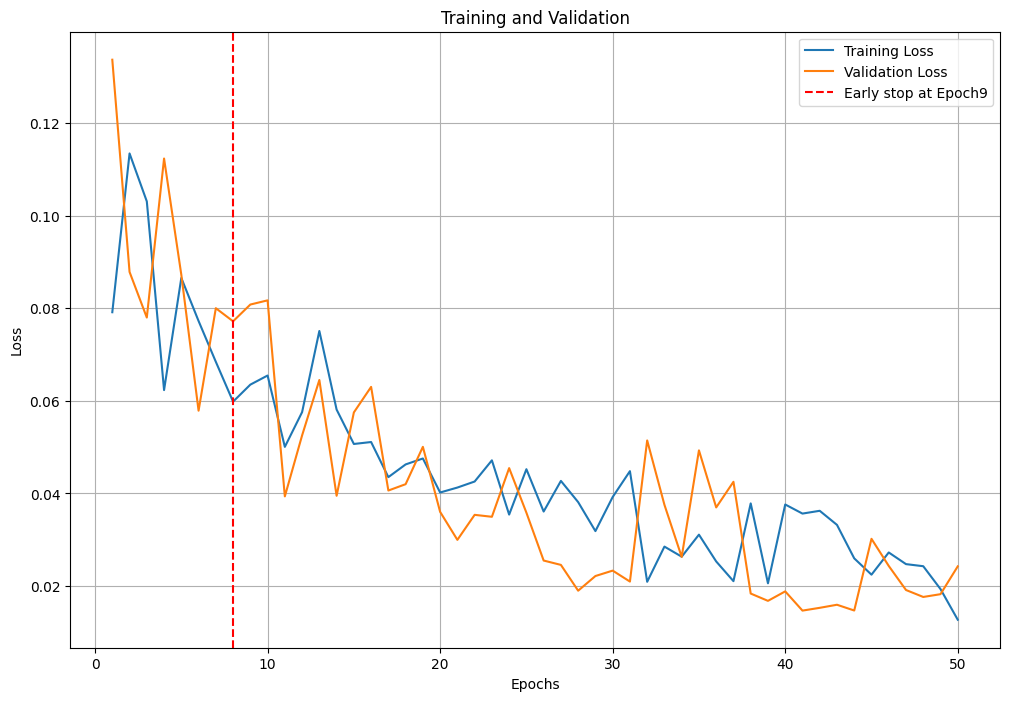

In [ ]:
from Inform_project_new.adaptation_method.train_autoencoder import train_val_encoder, plot_loss
from Inform_project_new.adaptation_method.Autoencoder.py import Autoencoder
import torch.nn as nn
import torch.optim as optim

#Instantiating model
model = Autoencoder()

# Defining Loss function and optimizer
Loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = run.config['learning_rate'], weight_decay = run.config['Weight_decay'])

encoded, avg_loss_train, val_encoded, avg_loss_val, stop_epoch = train_val_encoder(model, optimizer, Loss_func, run.config['epochs'], train_loader, test_loader, run)

plot_loss(run.config['epochs'], avg_loss_train, avg_loss_val, stop_epoch)


In [ ]:
encoder = encoded.squeeze(0)
encoder_transpose = encoder.permute(2,1,0)
encoder = encoder_transpose.detach().numpy()
print(encoder.shape)

(224, 224, 3)
